# Mid-semester assignment Part 1 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please copy it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1: Ofir Almog 207918731
<br>
Student 2: Adir Edri 206991762

## Sign Language Digits With NumPy
Sign Language Digits dataset contains 5,000 grayscale images in 10 categories. The images show individual articles of hand sign at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://www.researchgate.net/publication/344389112/figure/fig8/AS:941467451260937@1601474740275/Sample-images-from-ASL-with-digits-dataset.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>





The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of numbers ranging from '0' to '9'. These correspond to the *class* of hand sign digit the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Hand Sign Zero</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Hand Sign One</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Hand Sign Two</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Hand Sign Three</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Hand Sign Four</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Hand Sign Five</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Hand Sign Six</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Hand Sign Seven</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Hand Sign Eight</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Hand Sign Nine</td>
  </tr>
</table>

<br>

# Goodluck!

#Neural Network in plain NumPy

## Import Libraries

Import essential libraries for data processing, neural network implementation and visualization. These libraries will provide the foundation for building our sign language classifier from scratch.

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

## Dwonload Dataset

In [ ]:
%%capture
!pip install ipython-autotime
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq
%load_ext autotime

time: 503 µs (started: 2024-12-24 14:53:36 +00:00)


Loading the dataset as NumPy arrays:

* The `dataset` file is a NumPy array containing the image pixles. As you can see, it includes 5,000 rows for each image and 784 columns for each pixel in the image (28x28).
* The `labels` file is a NumPy array containing the images labels. As you can see, it includes 5,000 rows for each image corresponding to the dataset.

In [ ]:
loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 47.1 ms (started: 2024-12-24 14:53:36 +00:00)


## Data preprocessing (10%)

### Feature scaling

Preprocessing the input data by normalizing the pixel values ​​to the range [0,1] and reshaping matrices for efficient computation in our neural network.

In [ ]:
examples = y.shape[0]
y1 = y.reshape(1, examples)
X1 = X / 255
X1 = X1.T
print(X1.shape)

(784, 5000)
time: 10.4 ms (started: 2024-12-24 14:53:36 +00:00)


### Select two classes

Selecting two specific classes from our sign language dataset (6 and 7) and preparing them for binary classification by converting them to 0/1 labels. This step creates the basis for our neural network that will distinguish between these two hand signs.

In [ ]:
#TODO: select two classes (for example 2-Pullover and 4-Coat)
print("Original label values:", np.unique(y1))

# Create masks from original labels y1
class_6_indices = (y1[0] == '6')
class_7_indices = (y1[0] == '7')

# Select data and labels
X = X1[:, class_6_indices | class_7_indices]
Y = y1[:, class_6_indices | class_7_indices]

# Convert to binary labels
Y = (Y == '7').astype(int)

print("\nAfter selection:")
print("X shape:", X.shape)
print("Y shape:", Y.shape)
print("Binary label distribution:", np.unique(Y, return_counts=True))

Original label values: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']

After selection:
X shape: (784, 1000)
Y shape: (1, 1000)
Binary label distribution: (array([0, 1]), array([500, 500]))
time: 11.4 ms (started: 2024-12-24 14:53:36 +00:00)


### Split the data into Train set and Test set

Splitting the data into training (80%) and test (20%) sets while maintaining class balance. This ensures our model will learn and be evaluated on representative samples of both hand signs.

In [ ]:
# TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)
from sklearn.utils import shuffle

X = X.T  # transpose
Y = Y.ravel()  # flat multi dimension array into 1 dimensional

# data balance before split
print("\nCheck data balance before split:")
print("Original Y values distribution:", np.unique(Y, return_counts=True))

# Get indices for each class
class_0_indices = np.where(Y == 0)[0]
class_1_indices = np.where(Y == 1)[0]

# Split each class separately (80% train, 20% test)
train_0 = class_0_indices[:int(0.8 * len(class_0_indices))] #select all elements from start until index at 80% of the length
test_0 = class_0_indices[int(0.8 * len(class_0_indices)):] #select all elements from index at 80% of the length until end
train_1 = class_1_indices[:int(0.8 * len(class_1_indices))]
test_1 = class_1_indices[int(0.8 * len(class_1_indices)):]

# Combine indices
train_indices = np.concatenate([train_0, train_1])
test_indices = np.concatenate([test_0, test_1])

# Create train and test sets
X_train = X[train_indices].T
X_test = X[test_indices].T
Y_train = Y[train_indices].reshape(-1, 1)
Y_test = Y[test_indices].reshape(-1, 1)

print("\nClass distribution in training set:")
print("Y_train unique values and counts:", np.unique(Y_train, return_counts=True))
print("\nClass distribution in test set:")
print("Y_test unique values and counts:", np.unique(Y_test, return_counts=True))


Check data balance before split:
Original Y values distribution: (array([0, 1]), array([500, 500]))

Class distribution in training set:
Y_train unique values and counts: (array([0, 1]), array([400, 400]))

Class distribution in test set:
Y_test unique values and counts: (array([0, 1]), array([100, 100]))
time: 10.1 ms (started: 2024-12-24 14:53:36 +00:00)


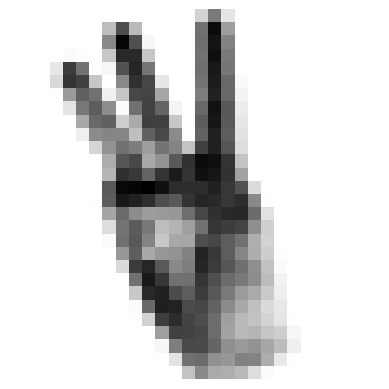

0

time: 116 ms (started: 2024-12-24 14:53:36 +00:00)


In [ ]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[i,0]

## Activation functions (10%)

Implemening the sigmoid activation function which will help our network learn non-linear patterns in the hand sign images and output probabilities between 0 and 1.

time: 126 ms (started: 2024-12-24 14:53:36 +00:00)


In [ ]:
#TODO: Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

time: 699 µs (started: 2024-12-24 14:53:36 +00:00)


## Loss Function (10%)

The BCE Loss function embodies the idea that the neural network should incur a substantial penalty (i.e., Loss tending toward infinity) when the predicted probability diverges significantly from the actual label of the training example. Conversely, the Loss should be zero (Loss = 0) when the predicted probability aligns perfectly with the label of the training example. In simpler terms, the BCE Loss should be zero in the following two situations:

- When the example has a positive label (${y} = 1$), the neural network should be entirely confident that the example belongs to the positive class, i.e., ($\hat{p} = 1 $).
- When the example has a negative label (${y} = 0$), the neural network should be entirely confident that the example does not belong to the positive class, i.e., ($\hat{p} = 0 $).

**It's important to note that when working with computers, extremely high or low values can sometimes be unmanageable and might even lead to system crashes. To address this, you must be aware of the range of values that cause the logarithm to yield infinity or negative infinity. Ensure you handle these edge cases within your function.**


Defining the Binary Cross Entropy loss function to measure how well our network is learning to distinguish between the two hand signs during training.

In [ ]:
#TODO: Binary cross entropy
def log_loss(y_hat, y):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    epsilon = 1e-15  # avoid log(0)
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    return float((-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).item())

time: 530 µs (started: 2024-12-24 14:53:36 +00:00)


## NN Hyper Parameters

Set up neural network architecture parameters including input layer (784 neurons for 28x28 images), hidden layer size, and training hyperparameters for optimal learning.

In [ ]:
input_layer = X_train.shape[0] # 28X28 = 784
hidden_layer = 64
learning_rate = 0.01
epochs = 40

time: 445 µs (started: 2024-12-24 14:53:36 +00:00)


## Weight and Bias Initialization

Initialize network weights and biases with random and zero values respectively. This helps break symmetry and allows the network to learn diverse features from the hand sign images.

In [ ]:
W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)
b2 = np.zeros((1, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(64, 784)
(64, 1)
(1, 64)
(1, 1)
time: 3.27 ms (started: 2024-12-24 14:53:36 +00:00)


## Training (30%)

Begin the training process by iterating through epochs and examples. During each iteration, we perform forward propagation, calculate loss, and update weights using backpropagation.

In [ ]:
X = X_train
Y = Y_train
loss_list = []
epoch_list = []
num_of_examples = X.shape[1]

for i in range(epochs):
  avg_epoch_loss = 0
  for j in range(num_of_examples):
    # TODO :  Forward propagation

    Z1 = np.matmul(W1, X[:,j].reshape(-1,1)) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2)
    Yout = Y[j].reshape(-1,1)

    # TODO: Compute loss
    loss = log_loss( A2, Yout)
    avg_epoch_loss = avg_epoch_loss + loss

    # # TODO: Back propagation
    dZ2 = (A2-Yout)
    dW2 = np.matmul(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * (A1 * (1-A1))
    dW1 = np.matmul(dZ1, X[:,j].reshape(1,-1))
    db1 = np.sum(dZ1, axis=1, keepdims=True)

    # TODO: Update weights
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

  avg_epoch_loss = avg_epoch_loss/num_of_examples
  loss_list.append(avg_epoch_loss)
  epoch_list.append(i)
  print("Epoch", i," Loss:", avg_epoch_loss)

Epoch 0  Loss: 0.1773944806712482
Epoch 1  Loss: 0.21770675278237403
Epoch 2  Loss: 0.18184279420430458
Epoch 3  Loss: 0.15822405464308412
Epoch 4  Loss: 0.1399515611778258
Epoch 5  Loss: 0.12512275595087383
Epoch 6  Loss: 0.113151397848427
Epoch 7  Loss: 0.10367859565678811
Epoch 8  Loss: 0.09628224164652459
Epoch 9  Loss: 0.09042885830572853
Epoch 10  Loss: 0.08564772220817568
Epoch 11  Loss: 0.08161736347040506
Epoch 12  Loss: 0.07813256740933372
Epoch 13  Loss: 0.07505800080292734
Epoch 14  Loss: 0.07229798876568061
Epoch 15  Loss: 0.06978093637270869
Epoch 16  Loss: 0.06745230628591942
Epoch 17  Loss: 0.0652712933444213
Epoch 18  Loss: 0.06320849618510913
Epoch 19  Loss: 0.0612435730945992
Epoch 20  Loss: 0.05936280022914055
Epoch 21  Loss: 0.057556817384504584
Epoch 22  Loss: 0.055818876198522986
Epoch 23  Loss: 0.0541437460430014
Epoch 24  Loss: 0.05252721519522524
Epoch 25  Loss: 0.050965972402454346
Epoch 26  Loss: 0.049457623174140875
Epoch 27  Loss: 0.04800065867537231
Epoch

### Loss Visualization

Visualize the loss curve over training epochs to monitor network's learning progress and convergence. This plot helps us assess if the network is learning effectively and identify potential issues like overfitting or slow convergence.

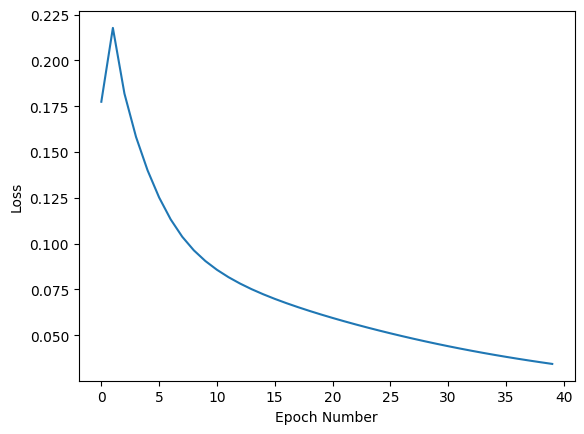

time: 344 ms (started: 2024-12-24 14:54:05 +00:00)


In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

## Results

### Test your performance (20%)

Evaluating the model's performance on the test set by making predictions and comparing them with real labels. This helps us assess how well our network generalizes to new images of hand signs.

We then generated the confusion matrix and accuracy metrics. This provides detailed insights into the classification performance of our model for both hand signals. finally, detailed confusion matrix statistics are presented to understand the strengths and weaknesses of the model in recognizing different hand signs.



Accuracy: 92.50 %


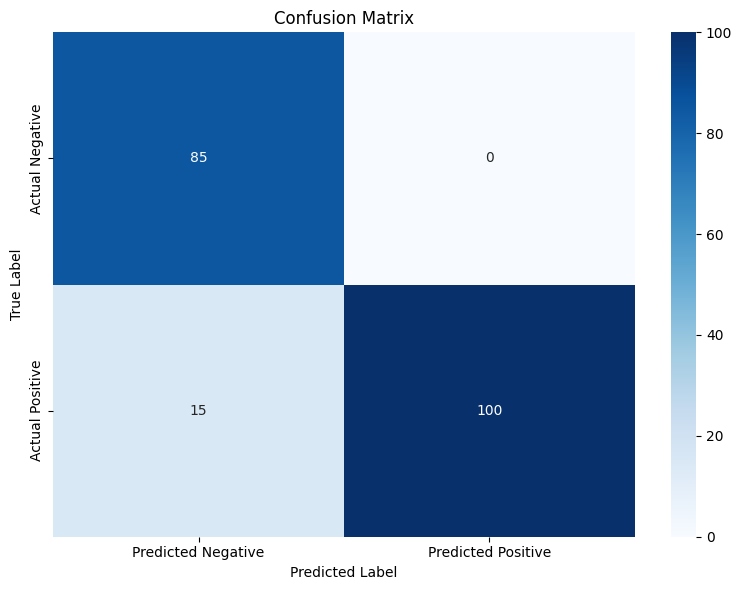

Confusion Matrix:
True Negatives (TN): 85
False Positives (FP): 0
False Negatives (FN): 15
True Positives (TP): 100
time: 521 ms (started: 2024-12-24 14:54:06 +00:00)


In [ ]:
#TODO: Forward batch of examples
X = X_test
Y = Y_test

Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = np.zeros((1,Y.shape[0]))
labels = np.zeros((1,Y.shape[0]))

# Check your predictions against the test's labels
for i in range(Y.shape[0]):
  if (A2[0,i] > 0.5):
    predictions[0,i] = 1
  labels[0,i] = Y[i,0]

# Calculate confusion matrix
cm = confusion_matrix(predictions.T, labels.T)

# Calculate accuracy
accuracy = accuracy_score(labels.T, predictions.T)
print(f"Accuracy: {accuracy * 100:.2f} %")

# Visualize confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Print confusion matrix details
print("Confusion Matrix:")
print(f"True Negatives (TN): {cm[0,0]}")
print(f"False Positives (FP): {cm[0,1]}")
print(f"False Negatives (FN): {cm[1,0]}")
print(f"True Positives (TP): {cm[1,1]}")

### Visualize the results

Visualize model predictions on randomly selected test examples, showing both the input image and the model's confidence in its prediction. This helps us intuitively understand how well our network recognizes different hand sign variations.

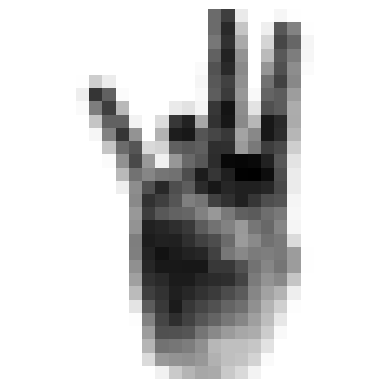

Real= 1 Predicted= [[0.99956035]]


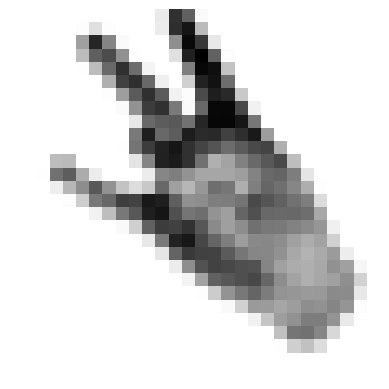

Real= 1 Predicted= [[0.99808552]]


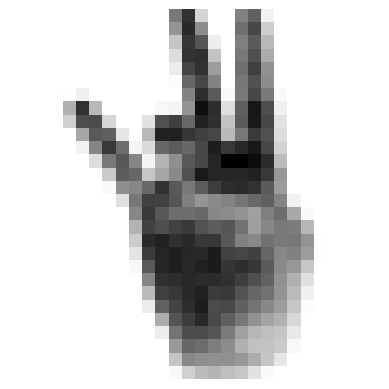

Real= 1 Predicted= [[0.99969255]]


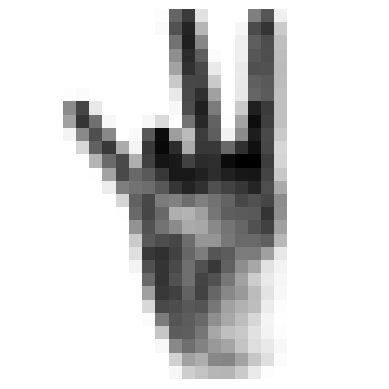

Real= 1 Predicted= [[0.99599576]]


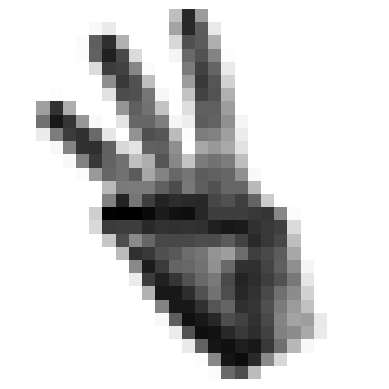

Real= 0 Predicted= [[0.32730639]]


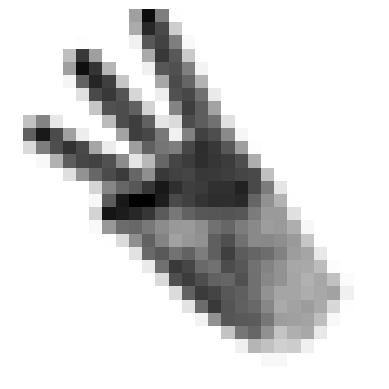

Real= 0 Predicted= [[0.03296863]]


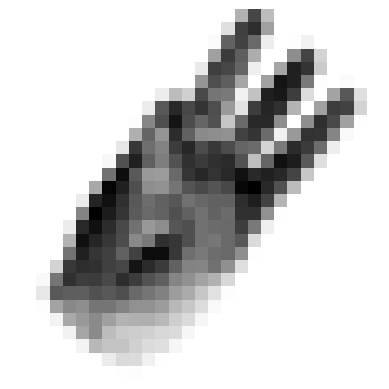

Real= 0 Predicted= [[0.01030326]]


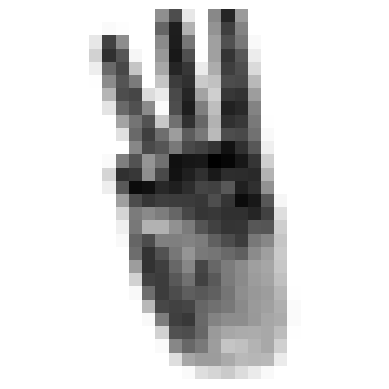

Real= 0 Predicted= [[0.04838763]]


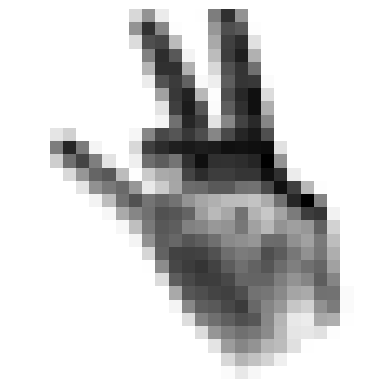

Real= 1 Predicted= [[0.99993532]]


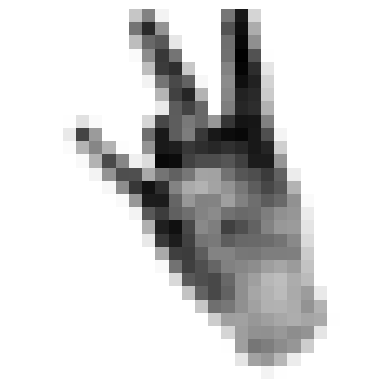

Real= 1 Predicted= [[0.98521096]]
time: 1.14 s (started: 2024-12-24 14:54:06 +00:00)


In [ ]:
#TODO: SHOW VISUALLY RESULTS ON 10 TEST EXAMPLES
%matplotlib inline
from numpy import random
for example in range(10):
  i = random.randint(200)
  plt.imshow(X_test[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
  plt.axis("off")
  plt.show()
  Y_test[i,0]

  # TODO :  Forward propagation
  Z1 = np.matmul(W1,X_test[:,i])
  A1 = sigmoid(Z1)
  Z2 = np.matmul(W2, A1) + b2
  A2 = sigmoid(Z2)
  Yout = Y[i,0]
  print("Real=", Y_test[i,0], "Predicted=",A2)